<a href="https://colab.research.google.com/github/poer1tonie/Dicoding-poer1tonie-Dicoding-Bike-Sharing-Dataset/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Budi Purwantoni
- **Email:** budi.purwantoni@gmail.com
- **ID Dicoding:** poer_1_tonie

## Menentukan Pertanyaan Bisnis

- Apakah kondisi cuaca mempengaruhi jumlah pengguna sepeda ?
- Apakah ada korelasi antara suhu yang menunjukkan kondisi ketika jumlah penyewaan sepeda tinggi ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bike_day = pd.read_csv("/content/drive/MyDrive/Dicoding/Proyek Akhir/day.csv")
bike_hour = pd.read_csv("/content/drive/MyDrive/Dicoding/Proyek Akhir/hour.csv")

In [ ]:
bike_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
bike_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data


*   Data Type




In [ ]:
print('Dataframe day:')
print(bike_day.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
print('\nDataframe hour:')
print(bike_hour.info())


Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


**Insight:**
Hasil observasi pada bike_day dan bike_hour, terdapat kesalahan dalam jenis tipe data pada kolom dteday yaitu tipe data pada dteday seharusnya datetime bukan object


*   Cek Duplikasi Data



In [ ]:
print('Dataframe day:', bike_day.duplicated().sum())
print("Dataframe hour:", bike_hour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


**Insight:** Hasil pengecekan duplikasi data menunjukkan kedua dataset tidak ada yang mengalami duplikasi.


*   Check Missing Value



In [ ]:
print('Dataframe day:')
print(bike_day.isna().sum())

print('\nDataframe hour:')
print(bike_hour.isna().sum())


Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:** Hasil cek missing value menunjukkan kedua dataset tidak memiliki nilai yang hilang atau kosong.

### Cleaning Data


*   Memperbaiki Tipe Data Kolom dteday



In [ ]:
# bike_day
bike_day["dteday"] = pd.to_datetime(bike_day["dteday"])
# bike_hour
bike_hour["dteday"] = pd.to_datetime(bike_hour["dteday"])

In [ ]:
#Hasil perbaikan tipe data kolom dteday
print('bike_day["dteday"] : ', bike_day["dteday"].dtypes)
print('bike_hour["dteday"] : ', bike_hour["dteday"].dtypes)

bike_day["dteday"] :  datetime64[ns]
bike_hour["dteday"] :  datetime64[ns]


In [ ]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
perbaikan tipe data kolom dteday menjadi datetime64

In [ ]:
# Changing column names (Optional)
bike_day.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'count'
}, inplace=True)

bike_day.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Changing data types
# Weekday, month, year columns
bike_day['weekday'] = bike_day['dateday'].dt.day_name()
bike_day['year'] = bike_day['dateday'].dt.year

# Season column
bike_day['season'] = bike_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# Weathersit column
bike_day['weathersit'] = bike_day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

bike_day.head()


,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,1,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_day.dtypes

,0
instant,int64
dateday,datetime64[ns]
season,object
year,int32
month,int64
holiday,int64
weekday,object
workingday,int64
weathersit,object
temp,float64


In [ ]:

# Resampling data based on month and calculating total rides
monthly_rent_df = bike_day.resample(rule='M', on='dateday').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

# Change index format to month-year (Jan-20, Feb-20, etc.)
monthly_rent_df.index = monthly_rent_df.index.strftime('%b-%y')
monthly_rent_df = monthly_rent_df.reset_index()

# Rename columns
monthly_rent_df.rename(columns={
    "dateday": "yearmonth",
    "count": "total_rides",
    "casual": "casual_rides",
    "registered": "registered_rides"
}, inplace=True)

monthly_rent_df


,yearmonth,casual_rides,registered_rides,total_rides
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


In [ ]:
# Menghapus instant column (tidak ada informasi penting berkaitan dengan pertanyaan)
# Menghapus the windspeed column (tidak ada informasi penting berkaitan dengan pertanyaan)
drop_columns = ['instant', 'windspeed']

for col in bike_day.columns:
    if col in drop_columns:
        bike_day.drop(labels=col, axis=1, inplace=True)

bike_day.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,2011,1,0,Saturday,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,2011,1,0,Sunday,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,2011,1,0,Monday,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,2011,1,0,Tuesday,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,2011,1,0,Wednesday,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


Simpan data yang telah di-cleaning

In [ ]:
bike_day.to_csv("bike_day_cleaned.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...


*   Hubungan antara Penyewa Casual, Registered, dan Total



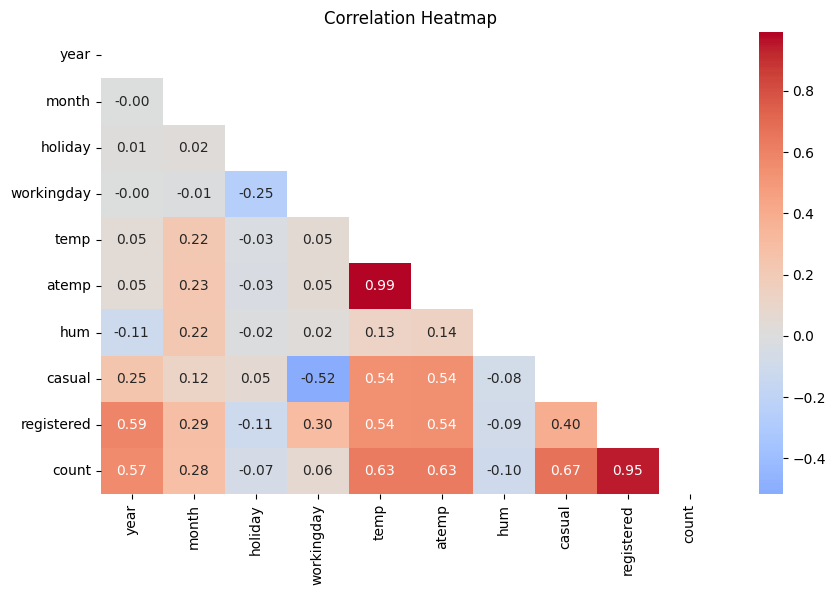

In [ ]:
# Creating a correlation heatmap to visualize the relationship between casual, registered, and count renters
fig, ax = plt.subplots(figsize=(10, 6))
correlation_matrix = bike_day.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()

**Insight :**
* Variabel atemp dan temp memiliki korelasi yang sangat tinggi, yaitu sebesar 0.99, menunjukkan bahwa keduanya memiliki hubungan yang sangat erat.
* Variabel hum memiliki korelasi yang lemah dengan temp dan atemp, yaitu sebesar 0.13 dan 0.14, menunjukkan bahwa hubungan antara kelembaban udara dengan suhu dan suhu rasakan tidak begitu kuat.
* Variabel casual cukup berkorelasi dengan temp dan atemp, dengan koefisien korelasi sebesar 0.54, dan sedikit berkorelasi negatif dengan hum, yaitu sebesar -0.08.
* Variabel registered memiliki pola yang sama dengan casual, dan memiliki korelasi moderat dengan casual sebesar 0.40.
* Variabel count berkorelasi kuat dengan temp, atemp, casual, dan registered, dengan koefisien korelasi masing-masing sebesar 0.63, 0.63, 0.67, dan 0.95. Namun, variabel count memiliki korelasi sedikit negatif dengan hum, yaitu sebesar -0.10.


*   Analisis Statistik Penyewaan Sepeda Berdasarkan Bulan



In [ ]:
grouped_by_month = bike_day.groupby('month')

aggregated_stats_by_month = grouped_by_month['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_month

,max,min,mean,sum
month,,,,
1,4521,431,2176.338710,134933
2,5062,1005,2655.298246,151352
3,8362,605,3692.258065,228920
4,7460,795,4484.900000,269094
5,8294,2633,5349.774194,331686
6,8120,3767,5772.366667,346342
7,8173,3285,5563.677419,344948
8,7865,1115,5664.419355,351194
9,8714,1842,5766.516667,345991


**Insight :** Dapat disimpulkan bahwa Bulan Juni sebagai bulan dengan jumlah penyewaan sepeda tertinggi secara rata-rata. Sebaliknya, bulan Januari merupakan bulan dengan aktivitas penyewaan sepeda yang paling minim

*   Analisis Statistik Penyewaan Sepeda Berdasarkan Cuaca



In [ ]:
grouped_by_weather = bike_day.groupby('weathersit')

aggregated_stats_by_weather = grouped_by_weather['count'].agg(['max', 'min', 'mean', 'sum'])
aggregated_stats_by_weather

,max,min,mean,sum
weathersit,,,,
Clear/Partly Cloudy,8714,431,4876.786177,2257952
Light Snow/Rain,4639,22,1803.285714,37869
Misty/Cloudy,8362,605,4035.862348,996858


**Insight:** Kondisi cuaca yang cerah atau sebagian cerah ("Clear/Partly Cloudy") cenderung memiliki jumlah penyewa sepeda yang lebih tinggi, diikuti oleh kondisi cuaca "Misty/Cloudy", sementara kondisi cuaca "Light Snow/Rain" memiliki jumlah penyewa sepeda yang paling rendah.

*   Analisis Penyewaan Sepeda Berdasarkan Musim



In [ ]:
grouped_by_season = bike_day.groupby('season')

aggregated_stats_by_season = grouped_by_season.agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})
aggregated_stats_by_season


casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

**Insight:** Musim gugur dan musim panas menunjukkan aktivitas penyewaan sepeda yang lebih tinggi, sedangkan musim semi dan musim dingin memiliki aktivitas yang sedikit lebih rendah.*italicized text*


*   Analisis Statistik Variabel Cuaca Berdasarkan Musim


In [ ]:
aggregated_stats_by_season = bike_day.groupby('season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})
aggregated_stats_by_season

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

**Insight :**
* Rata-rata temperatur dan suhu rasakan tertinggi terjadi pada musim gugur (fall season), yang kemudian diikuti oleh musim panas (summer), musim dingin (winter), dan musim semi (spring).

* Rata-rata kelembaban tertinggi terjadi pada musim dingin (winter season), yang kemudian diikuti oleh musim gugur (fall), musim panas (summer), dan musim semi (spring).





## Visualization & Explanatory Analysis

### Pertanyaan 1:

* Apakah kondisi cuaca mempengaruhi jumlah pengguna sepeda?

In [ ]:
fig = px.box(bike_day, x='weathersit', y='count', color='weathersit',
             title='Bike Users Distribution Based on Weather Condition',
             labels={'weathersit': 'Weather Condition', 'count': 'Total Rentals'})

fig.show()

**Insight:** Dari hasil box plot dapat disimpulkan bahwa kondisi cuaca yang cerah atau sebagian cerah ("Clear/Partly Cloudy") cenderung memiliki jumlah penyewa sepeda yang lebih banyak, diikuti oleh kondisi cuaca "Misty/Cloudy", sementara kondisi cuaca "Light Snow/Rain" memiliki jumlah penyewa sepeda yang paling sedikit. Hal ini membuktikan cuaca dapat mempengaruhi atau berperan penting dalam penggunaan sepeda.

### Pertanyaan 2:

* Apakah ada korelasi antara suhu yang menunjukkan kondisi ketika jumlah penyewaan sepeda tinggi?

In [ ]:
fig = px.scatter(bike_day, x='temp', y='count', color='season',
                 title='Bike Rental Clusters by Season and Temperature',
                 labels={'temp': 'Temperature (°C)', 'count': 'Total Rentals'},
                 color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
                 hover_name='season')

fig.show()

**Insight:**
* Cuaca dingin pada musim dingin mengurangi jumlah penyewaan sepeda.
* Peningkatan suhu terutama selama musim panas meningkatkan jumlah penyewaan.
* Ada titik optimal suhu di musim gugur dan musim panas yang meningkatkan jumlah penyewaan.

## Conclusion

- Conclution pertanyaan 1 :  Kondisi cuaca memang mempengaruhi jumlah pengguna sepeda. Pada hari-hari dengan kondisi cuaca yang baik, seperti cerah atau berawan maka jumlah pengguna sepeda cenderung meningkat. Sebaliknya, saat kondisi cuaca buruk seperti hujan atau salju maka jumlah pengguna sepeda cenderung menurun.
- Conclution pertanyaan 2 : Terdapat hubungan yang jelas antara suhu dan jumlah penyewaan sepeda. Saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat terutama selama musim panas dan gugur. Sebaliknya jumlah penyewaan cenderung rendah saat suhu lebih rendah khususnya selama musim dingin.